In [1]:
# Step1: Perform Exploratory Data Analysis (EDA)
import pandas as pd
df = pd.read_csv(r"C:\Users\KUSHMA\Downloads\Assignemnent Questions\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
# Summary statistics
summary = df.describe()
print(summary)

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

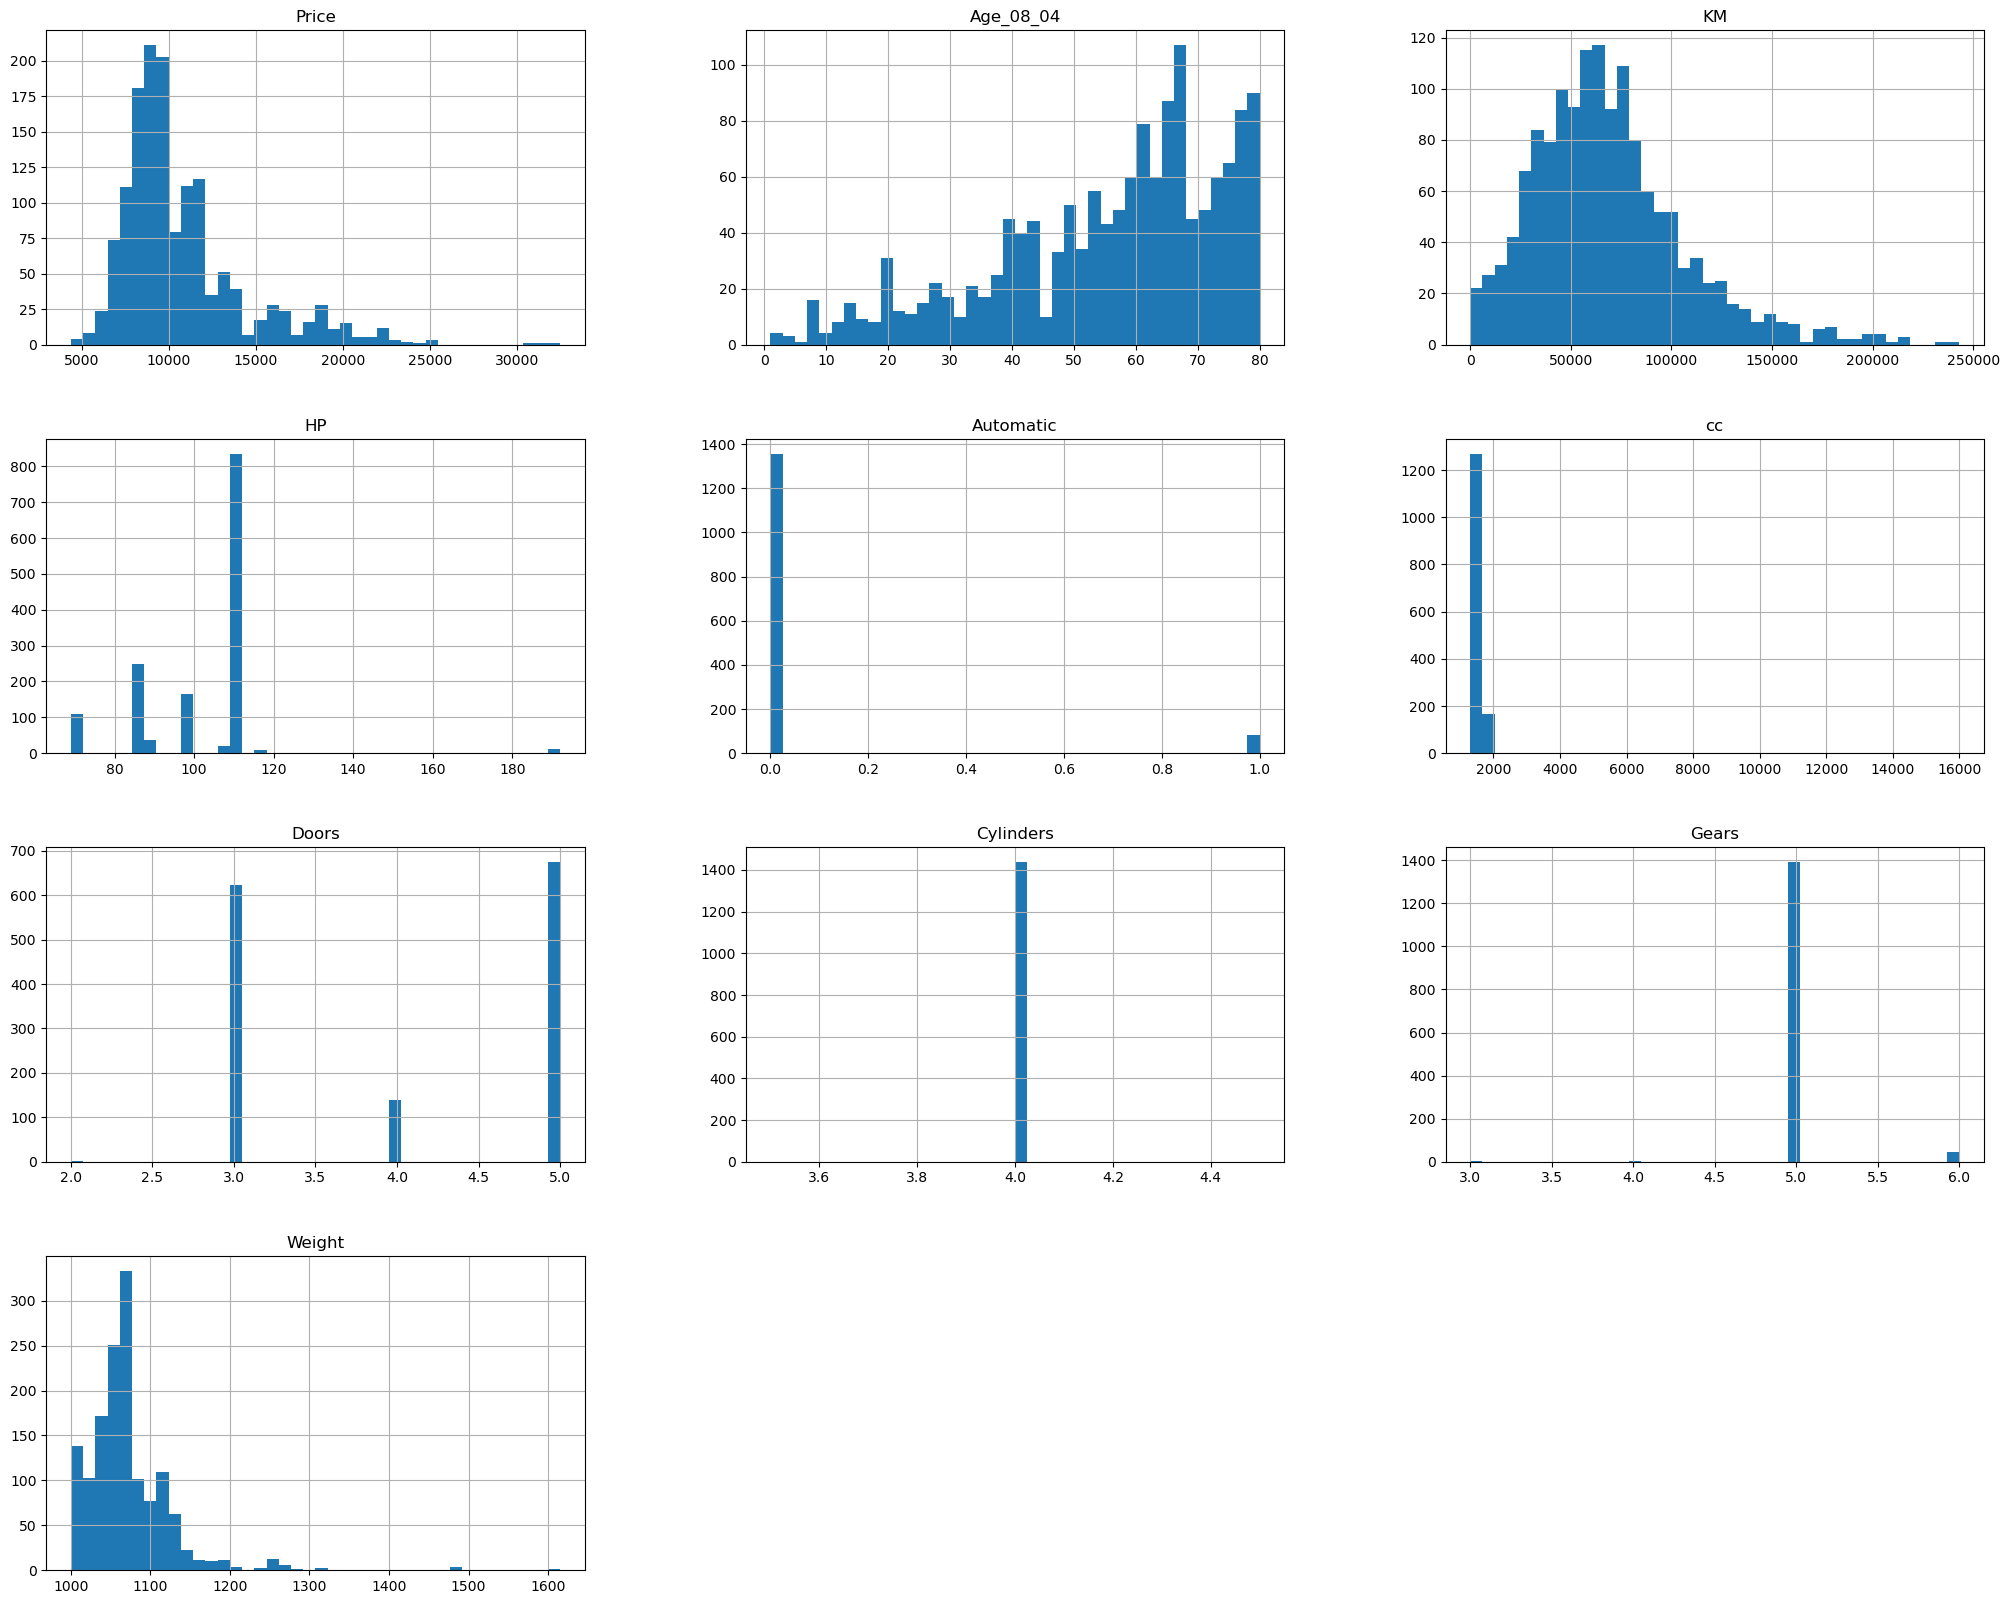

In [3]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Histograms
df.hist(bins=40, figsize=(25, 20))
plt.show()

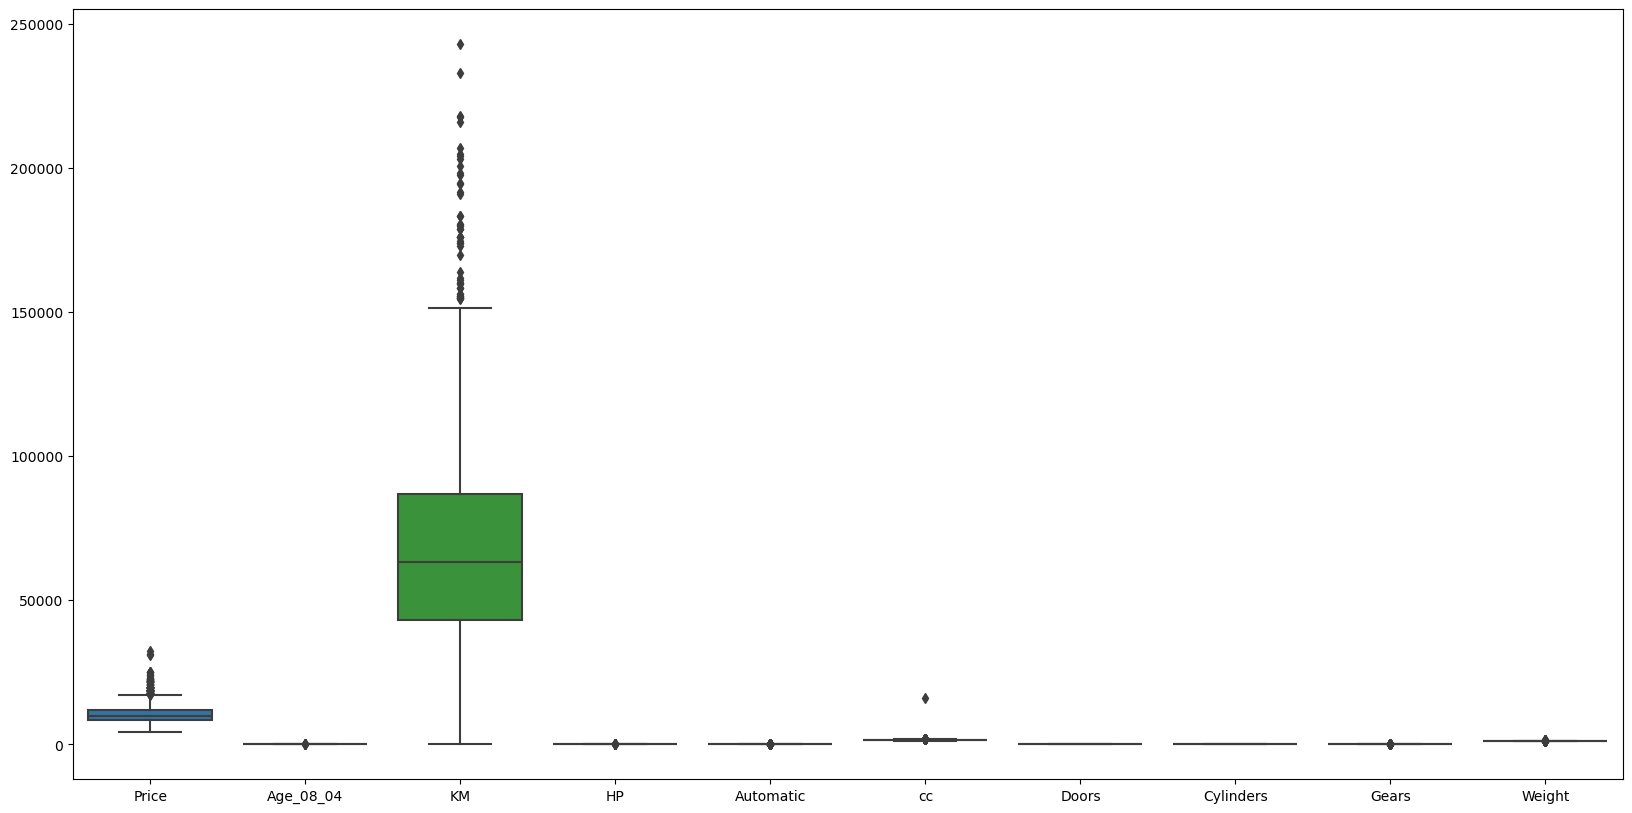

In [4]:
# Boxplots
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.show()

In [ ]:
# Scatter plots
sns.pairplot(df)
plt.show()

C:\Users\KUSHMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KUSHMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KUSHMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KUSHMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

In [ ]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)
# Handle non-numeric columns
df_numeric = df.drop(non_numeric_cols, axis=1)
# Correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Data Preprocessing

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Update numerical_features to include one-hot encoded column names if applicable
numerical_features = ['KM', 'HP', 'Doors', 'Weight']

# Select only the numeric columns that exist in df
existing_numeric_features = [col for col in numerical_features if col in df.columns]
df[existing_numeric_features] = scaler.fit_transform(df[existing_numeric_features])

In [ ]:
# Step 2: Split the Dataset

from sklearn.model_selection import train_test_split
X = df.drop('Price', axis=1)
y = df['Price']
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X) # Add this line to handle categorical features
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train,X_test,y_train,y_test)

In [ ]:
# Step 3: Build Multiple Linear Regression Models

# Model 1: Basic Linear Regression
from sklearn.linear_model import LinearRegression

# Model 1
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Coefficients
print("Model 1 Coefficients:", model1.coef_)
print("Model 1 Intercept:", model1.intercept_)

In [ ]:
# Model 2: Linear Regression with Polynomial Features

from sklearn.preprocessing import PolynomialFeatures

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Model 2
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

# Coefficients
print("Model 2 Coefficients:", model2.coef_)
print("Model 2 Intercept:", model2.intercept_)


In [ ]:
# Model 3: Linear Regression with Interaction Terms

# Adding interaction terms manually
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train_inter = poly.fit_transform(X_train)
X_test_inter = poly.transform(X_test)

# Model 3
model3 = LinearRegression()
model3.fit(X_train_inter, y_train)

# Coefficients
print("Model 3 Coefficients:", model3.coef_)
print("Model 3 Intercept:", model3.intercept_)

In [ ]:
# Step 4: Evaluate Model Performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Model Evaluation Function
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

# Evaluate Model 1
mae1, mse1, r21 = evaluate_model(model1, X_test, y_test)
print(f"Model 1 - MAE: {mae1}, MSE: {mse1}, R2: {r21}")

# Evaluate Model 2
mae2, mse2, r22 = evaluate_model(model2, X_test_poly, y_test)
print(f"Model 2 - MAE: {mae2}, MSE: {mse2}, R2: {r22}")

# Evaluate Model 3
mae3, mse3, r23 = evaluate_model(model3, X_test_inter, y_test)
print(f"Model 3 - MAE: {mae3}, MSE: {mse3}, R2: {r23}")


In [ ]:
# Step 5: Apply Lasso and Ridge Methods

#Lasso Regression
from sklearn.linear_model import Lasso

# Lasso Model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Evaluate Lasso Model
mae_lasso, mse_lasso, r2_lasso = evaluate_model(lasso, X_test, y_test)
print(f"Lasso - MAE: {mae_lasso}, MSE: {mse_lasso}, R2: {r2_lasso}")

In [ ]:
# Ridge Regression

from sklearn.linear_model import Ridge
# Ridge Model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Evaluate Ridge Model
mae_ridge, mse_ridge, r2_ridge = evaluate_model(ridge, X_test, y_test)
print(f"Ridge - MAE: {mae_ridge}, MSE: {mse_ridge}, R2: {r2_ridge}")


In [ ]:
# Interview Questions:
1.What is Normalization & Standardization and how is it helpful?
        In this part of our journey, we ve explored two important techniques called Normalization and 
    Standardization. These techniques help prepare your data for analysis. Like an alchemist turning 
    lead into gold, normalization changes your data to fit within a new scale of 0 to 1.
2.What techniques can be used to address multicollinearity in multiple linear regression?
        Removing predictors, combining predictors, PCA, and regularization By detecting 
    multicollinearity using correlation matrices, VIF, and condition indices, and addressing it 
    through techniques like removing predictors, combining predictors, PCA, and regularization,
    you can build more robust and interpretable regression models.